# Predict the Criminal

## Import Libraries

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Get the Data

In [27]:
train = pd.read_csv('./data/criminal_train.csv')
test = pd.read_csv('./data/criminal_test.csv')

In [28]:
train.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [29]:
test.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,1,2,1,1,1,99,...,2,2,2,1,1,2,2,16346.795400,40020,1
1,35494679,4,0,4,1,1,1,1,1,99,...,3,2,2,1,1,2,2,3008.863906,40044,2
2,79424679,2,0,3,1,2,1,1,1,99,...,1,2,2,2,2,2,2,266.952503,40040,2
3,11744679,4,0,6,1,2,1,1,1,99,...,3,2,2,1,1,2,2,5386.928199,40017,1
4,31554679,1,0,4,1,3,1,1,1,99,...,3,2,1,1,1,2,2,173.489895,40017,1


## Exploratory Data Analysis

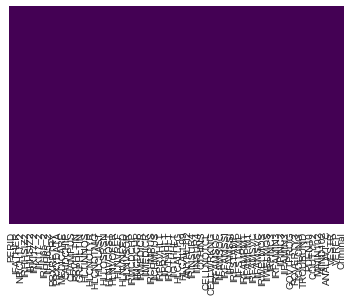

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

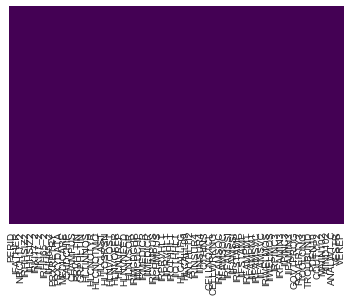

In [31]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

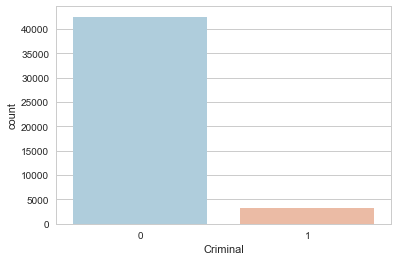

In [32]:
sns.set_style('whitegrid')
sns.countplot(x='Criminal',data=train,palette='RdBu_r')

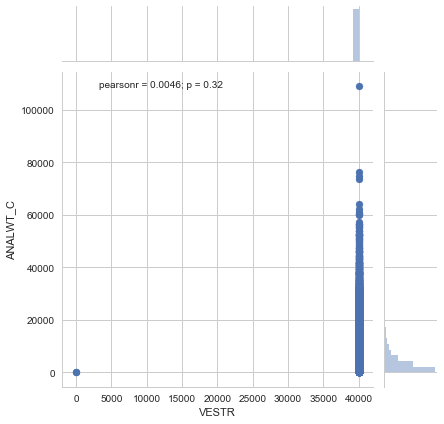

In [33]:
sns.jointplot(x="VESTR", y="ANALWT_C", data=train);


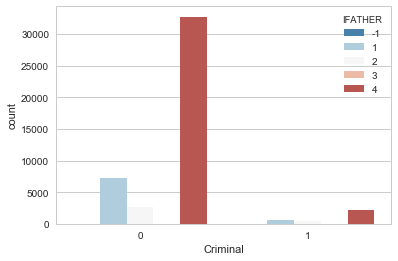

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Criminal',hue='IFATHER',data=train,palette='RdBu_r')

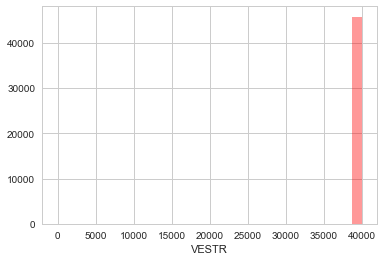

In [35]:
sns.distplot(train['VESTR'],bins=30,kde=False,color='red')

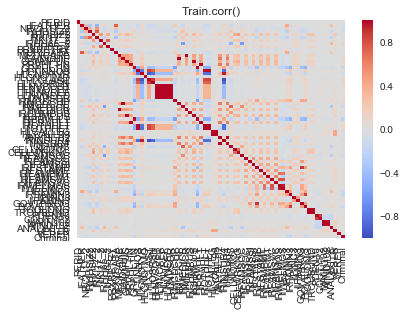

In [36]:
sns.heatmap(train.corr(),cmap='coolwarm')
plt.title('Train.corr()')

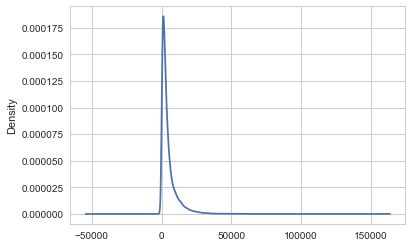

In [37]:
train['ANALWT_C'].plot.kde()

## Data Cleaning

### Drop unnecessary column PERID

In [38]:
train.drop("PERID",axis=1,inplace=True)

train.drop("IIHH65_2",axis=1,inplace=True)
test.drop("IIHH65_2",axis=1, inplace=True)

In [39]:
train.drop("HLCALL99",axis=1,inplace=True)
test.drop("HLCALL99",axis=1, inplace=True)

In [40]:
#train['ANALWT_C'] = train['ANALWT_C'].astype(int)
#test['ANALWT_C']    = test['ANALWT_C'].astype(int)

In [41]:
train.drop("IIFSTAMP",axis=1,inplace=True)
test.drop("IIFSTAMP",axis=1, inplace=True)

In [42]:
train.drop("MAIIN102",axis=1,inplace=True)
test.drop("MAIIN102",axis=1, inplace=True)

In [43]:
train.drop("HLNVREF",axis=1,inplace=True)
test.drop("HLNVREF",axis=1, inplace=True)

In [44]:
train.drop("IIHHSIZ2",axis=1,inplace=True)
test.drop("IIHHSIZ2",axis=1, inplace=True)

In [45]:
train.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,4,2,4,3,1,1,99,99,2,1,...,2,1,2,1,1,2,3884.805998,40026,1,0
1,4,1,3,2,1,1,99,99,2,2,...,1,2,2,2,3,2,1627.108106,40015,2,1
2,4,1,2,2,1,1,99,99,2,1,...,1,2,2,2,3,2,4344.957980,40024,1,0
3,4,0,2,1,1,1,99,99,2,2,...,3,2,2,1,1,2,792.521931,40027,1,0
4,1,0,6,4,1,1,99,1,2,1,...,1,2,2,2,2,2,1518.118526,40001,2,0


In [46]:
## Encoding variables

train.loc[ train['VESTR'] <= 40010, 'VESTR'] = 0
train.loc[(train['VESTR'] > 40010) & (train['VESTR'] <= 40025), 'VESTR'] = 1
train.loc[(train['VESTR'] > 40025) & (train['VESTR'] <= 40040), 'VESTR'] = 2
train.loc[ train['VESTR'] > 40040, 'VESTR'] = 3
test.loc[ test['VESTR'] <= 40010, 'VESTR'] = 0
test.loc[(test['VESTR'] > 40010) & (test['VESTR'] <= 40025), 'VESTR'] = 1
test.loc[(test['VESTR'] > 40025) & (test['VESTR'] <= 40040), 'VESTR'] = 2
test.loc[test['VESTR'] > 40040, 'VESTR'] = 3


In [47]:
train.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,4,2,4,3,1,1,99,99,2,1,...,2,1,2,1,1,2,3884.805998,2,1,0
1,4,1,3,2,1,1,99,99,2,2,...,1,2,2,2,3,2,1627.108106,1,2,1
2,4,1,2,2,1,1,99,99,2,1,...,1,2,2,2,3,2,4344.957980,1,1,0
3,4,0,2,1,1,1,99,99,2,2,...,3,2,2,1,1,2,792.521931,2,1,0
4,1,0,6,4,1,1,99,1,2,1,...,1,2,2,2,2,2,1518.118526,0,2,0


In [64]:
#'PRXRETRY','PRXYDATA','GRPHLTIN','HLTINNOS','HLCNOTMO','HLCLAST','HLLOSRSN','HLLOSRSN','HLNVCOST','HLNVCOST','HLNVREF','HLNVNEED','HLNVSOR','IROTHHLT','HLCALLFG','HLCALL99','IRWELMOS'
'HLCNOTMO' in list(train)

True

In [66]:
# train.loc[ train['HLCALL99'] <= 1, 'HLCALL99'] = 0
# train.loc[(train['HLCALL99'] > 1) & (train['HLCALL99'] <= 10), 'HLCALL99'] = 1
# train.loc[ train['HLCALL99'] > 10, 'HLCALL99'] = 2
# test.loc[ test['HLCALL99'] <= 1, 'HLCALL99'] = 0
# test.loc[(test['HLCALL99'] > 1) & (test['HLCALL99'] <= 10), 'HLCALL99'] = 1
# test.loc[test['HLCALL99'] > 10, 'HLCALL99'] = 2

train.loc[ train['HLCALLFG'] <= 1, 'HLCALLFG'] = 0
train.loc[(train['HLCALLFG'] > 1) & (train['HLCALLFG'] <= 10), 'HLCALLFG'] = 1
train.loc[ train['HLCALLFG'] > 10, 'HLCALLFG'] = 2
test.loc[ test['HLCALLFG'] <= 1, 'HLCALLFG'] = 0
test.loc[(test['HLCALLFG'] > 1) & (test['HLCALLFG'] <= 10), 'HLCALLFG'] = 1
test.loc[test['HLCALLFG'] > 10, 'HLCALLFG'] = 2


train.loc[ train['IROTHHLT'] <= 1, 'IROTHHLT'] = 0
train.loc[(train['IROTHHLT'] > 1) & (train['IROTHHLT'] <= 10), 'IROTHHLT'] = 1
train.loc[ train['IROTHHLT'] > 10, 'IROTHHLT'] = 2
test.loc[ test['IROTHHLT'] <= 1, 'IROTHHLT'] = 0
test.loc[(test['IROTHHLT'] > 1) & (test['IROTHHLT'] <= 10), 'IROTHHLT'] = 1
test.loc[test['IROTHHLT'] > 10, 'IROTHHLT'] = 2


train.loc[ train['HLNVSOR'] <= 1, 'HLNVSOR'] = 0
train.loc[(train['HLNVSOR'] > 1) & (train['HLNVSOR'] <= 10), 'HLNVSOR'] = 1
train.loc[ train['HLNVSOR'] > 10, 'HLNVSOR'] = 2
test.loc[ test['HLNVSOR'] <= 1, 'HLNVSOR'] = 0
test.loc[(test['HLNVSOR'] > 1) & (test['HLNVSOR'] <= 10), 'HLNVSOR'] = 1
test.loc[test['HLNVSOR'] > 10, 'HLNVSOR'] = 2

train.loc[ train['HLNVNEED'] <= 1, 'HLNVNEED'] = 0
train.loc[(train['HLNVNEED'] > 1) & (train['HLNVNEED'] <= 10), 'HLNVNEED'] = 1
train.loc[ train['HLNVNEED'] > 10, 'HLNVNEED'] = 2
test.loc[ test['HLNVNEED'] <= 1, 'HLNVNEED'] = 0
test.loc[(test['HLNVNEED'] > 1) & (test['HLNVNEED'] <= 10), 'HLNVNEED'] = 1
test.loc[test['HLNVNEED'] > 10, 'HLNVNEED'] = 2

# train.loc[ train['HLNVREF'] <= 1, 'HLNVREF'] = 0
# train.loc[(train['HLNVREF'] > 1) & (train['HLNVREF'] <= 10), 'HLNVREF'] = 1
# train.loc[ train['HLNVREF'] > 10, 'HLNVREF'] = 2
# test.loc[ test['HLNVREF'] <= 1, 'HLNVREF'] = 0
# test.loc[(test['HLNVREF'] > 1) & (test['HLNVREF'] <= 10), 'HLNVREF'] = 1
# test.loc[test['HLNVREF'] > 10, 'HLNVREF'] = 2

train.loc[ train['HLNVCOST'] <= 1, 'HLNVCOST'] = 0
train.loc[(train['HLNVCOST'] > 1) & (train['HLNVCOST'] <= 10), 'HLNVCOST'] = 1
train.loc[ train['HLNVCOST'] > 10, 'HLNVCOST'] = 2
test.loc[ test['HLNVCOST'] <= 1, 'HLNVCOST'] = 0
test.loc[(test['HLNVCOST'] > 1) & (test['HLNVCOST'] <= 10), 'HLNVCOST'] = 1
test.loc[test['HLNVCOST'] > 10, 'HLNVCOST'] = 2

train.loc[ train['HLLOSRSN'] <= 1, 'HLLOSRSN'] = 0
train.loc[(train['HLLOSRSN'] > 1) & (train['HLLOSRSN'] <= 10), 'HLLOSRSN'] = 1
train.loc[ train['HLLOSRSN'] > 10, 'HLLOSRSN'] = 2
test.loc[ test['HLLOSRSN'] <= 1, 'HLLOSRSN'] = 0
test.loc[(test['HLLOSRSN'] > 1) & (test['HLLOSRSN'] <= 10), 'HLLOSRSN'] = 1
test.loc[test['HLLOSRSN'] > 10, 'HLLOSRSN'] = 2

train.loc[ train['HLCLAST'] <= 1, 'HLCLAST'] = 0
train.loc[(train['HLCLAST'] > 1) & (train['HLCLAST'] <= 10), 'HLCLAST'] = 1
train.loc[ train['HLCLAST'] > 10, 'HLCLAST'] = 2
test.loc[ test['HLCLAST'] <= 1, 'HLCLAST'] = 0
test.loc[(test['HLCLAST'] > 1) & (test['HLCLAST'] <= 10), 'HLCLAST'] = 1
test.loc[test['HLCLAST'] > 10, 'HLCLAST'] = 2

train.loc[ train['HLCNOTMO'] <= 1, 'HLCNOTMO'] = 0
train.loc[(train['HLCNOTMO'] > 1) & (train['HLCNOTMO'] <= 10), 'HLCNOTMO'] = 1
train.loc[ train['HLCNOTMO'] > 10, 'HLCNOTMO'] = 2
test.loc[ test['HLCNOTMO'] <= 1, 'HLCNOTMO'] = 0
test.loc[(test['HLCNOTMO'] > 1) & (test['HLCNOTMO'] <= 10), 'HLCNOTMO'] = 1
test.loc[test['HLCNOTMO'] > 10, 'HLCNOTMO'] = 2

train.loc[ train['PRXRETRY'] <= 1, 'PRXRETRY'] = 0
train.loc[(train['PRXRETRY'] > 1) & (train['PRXRETRY'] <= 10), 'PRXRETRY'] = 1
train.loc[ train['PRXRETRY'] > 10, 'PRXRETRY'] = 2
test.loc[ test['PRXRETRY'] <= 1, 'PRXRETRY'] = 0
test.loc[(test['PRXRETRY'] > 1) & (test['PRXRETRY'] <= 10), 'PRXRETRY'] = 1
test.loc[test['PRXRETRY'] > 10, 'PRXRETRY'] = 2

train.loc[ train['PRXYDATA'] <= 1, 'PRXYDATA'] = 0
train.loc[(train['PRXYDATA'] > 1) & (train['PRXYDATA'] <= 10), 'PRXYDATA'] = 1
train.loc[ train['PRXYDATA'] > 10, 'PRXYDATA'] = 2
test.loc[ test['PRXYDATA'] <= 1, 'PRXYDATA'] = 0
test.loc[(test['PRXYDATA'] > 1) & (test['PRXYDATA'] <= 10), 'PRXYDATA'] = 1
test.loc[test['PRXYDATA'] > 10, 'PRXYDATA'] = 2

train.loc[ train['GRPHLTIN'] <= 1, 'GRPHLTIN'] = 0
train.loc[(train['GRPHLTIN'] > 1) & (train['GRPHLTIN'] <= 10), 'GRPHLTIN'] = 1
train.loc[ train['GRPHLTIN'] > 10, 'GRPHLTIN'] = 2
test.loc[ test['GRPHLTIN'] <= 1, 'GRPHLTIN'] = 0
test.loc[(test['GRPHLTIN'] > 1) & (test['GRPHLTIN'] <= 10), 'GRPHLTIN'] = 1
test.loc[test['GRPHLTIN'] > 10, 'GRPHLTIN'] = 2

train.loc[ train['HLTINNOS'] <= 1, 'HLTINNOS'] = 0
train.loc[(train['HLTINNOS'] > 1) & (train['HLTINNOS'] <= 10), 'HLTINNOS'] = 1
train.loc[ train['HLTINNOS'] > 10, 'HLTINNOS'] = 2
test.loc[ test['HLTINNOS'] <= 1, 'HLTINNOS'] = 0
test.loc[(test['HLTINNOS'] > 1) & (test['HLTINNOS'] <= 10), 'HLTINNOS'] = 1
test.loc[test['HLTINNOS'] > 10, 'HLTINNOS'] = 2

train.loc[ train['IRWELMOS'] <= 1, 'IRWELMOS'] = 0
train.loc[(train['IRWELMOS'] > 1) & (train['IRWELMOS'] <= 10), 'IRWELMOS'] = 1
train.loc[ train['IRWELMOS'] > 10, 'IRWELMOS'] = 2
test.loc[ test['IRWELMOS'] <= 1, 'IRWELMOS'] = 0
test.loc[(test['IRWELMOS'] > 1) & (test['IRWELMOS'] <= 10), 'IRWELMOS'] = 1
test.loc[test['IRWELMOS'] > 10, 'IRWELMOS'] = 2



In [67]:

train.loc[ train['ANALWT_C'] <= 10000, 'ANALWT_C'] = 0
train.loc[(train['ANALWT_C'] > 10000) & (train['ANALWT_C'] <= 20000), 'ANALWT_C'] = 1
train.loc[(train['ANALWT_C'] > 20000) & (train['ANALWT_C'] <= 30000), 'ANALWT_C'] = 2
train.loc[(train['ANALWT_C'] > 30000) & (train['ANALWT_C'] <= 40000), 'ANALWT_C'] = 3
train.loc[(train['ANALWT_C'] > 40000) & (train['ANALWT_C'] <= 50000), 'ANALWT_C'] = 4
train.loc[(train['ANALWT_C'] > 50000) & (train['ANALWT_C'] <= 60000), 'ANALWT_C'] = 5
train.loc[(train['ANALWT_C'] > 60000) & (train['ANALWT_C'] <= 70000), 'ANALWT_C'] = 6
train.loc[(train['ANALWT_C'] > 70000) & (train['ANALWT_C'] <= 80000), 'ANALWT_C'] = 7
train.loc[(train['ANALWT_C'] > 80000) & (train['ANALWT_C'] <= 90000), 'ANALWT_C'] = 8
train.loc[ train['ANALWT_C'] > 90000, 'ANALWT_C'] = 9


test.loc[ test['ANALWT_C'] <= 10000, 'ANALWT_C'] = 0
test.loc[(test['ANALWT_C'] > 10000) & (test['ANALWT_C'] <= 20000), 'ANALWT_C'] = 1
test.loc[(test['ANALWT_C'] > 20000) & (test['ANALWT_C'] <= 30000), 'ANALWT_C'] = 2
test.loc[(test['ANALWT_C'] > 30000) & (test['ANALWT_C'] <= 40000), 'ANALWT_C'] = 3
test.loc[(test['ANALWT_C'] > 40000) & (test['ANALWT_C'] <= 50000), 'ANALWT_C'] = 4
test.loc[(test['ANALWT_C'] > 50000) & (test['ANALWT_C'] <= 60000), 'ANALWT_C'] = 5
test.loc[(test['ANALWT_C'] > 60000) & (test['ANALWT_C'] <= 70000), 'ANALWT_C'] = 6
test.loc[(test['ANALWT_C'] > 70000) & (test['ANALWT_C'] <= 80000), 'ANALWT_C'] = 7
test.loc[(test['ANALWT_C'] > 80000) & (test['ANALWT_C'] <= 90000), 'ANALWT_C'] = 8
test.loc[test['ANALWT_C'] > 90000, 'ANALWT_C'] = 9

In [68]:
train.head()

,IFATHER,NRCH17_2,IRHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,PRXRETRY,PRXYDATA,MEDICARE,CAIDCHIP,...,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,4,2,4,3,1,1,1,1,2,1,...,2,1,2,1,1,2,0.0,2,1,0
1,4,1,3,2,1,1,1,1,2,2,...,1,2,2,2,3,2,0.0,1,2,1
2,4,1,2,2,1,1,1,1,2,1,...,1,2,2,2,3,2,0.0,1,1,0
3,4,0,2,1,1,1,1,1,2,2,...,3,2,2,1,1,2,0.0,2,1,0
4,1,0,6,4,1,1,1,0,2,1,...,1,2,2,2,2,2,0.0,0,2,0


In [69]:
test.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,PRXRETRY,PRXYDATA,MEDICARE,...,GOVTPROG,POVERTY3,TOOLONG,TROUBUND,PDEN10,COUTYP2,AIIND102,ANALWT_C,VESTR,VEREP
0,66583679,4,0,4,2,1,1,1,1,2,...,2,2,2,2,1,1,2,0.0,1,1
1,35494679,4,0,4,1,1,1,1,1,2,...,2,3,2,2,1,1,2,0.0,3,2
2,79424679,2,0,3,2,1,1,1,0,2,...,1,1,2,2,2,2,2,0.0,2,2
3,11744679,4,0,6,2,1,1,1,1,2,...,2,3,2,2,1,1,2,0.0,1,1
4,31554679,1,0,4,3,1,1,1,0,2,...,2,3,2,1,1,1,2,0.0,1,1


# Building a Model

## Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split
X = train.drop('Criminal',axis=1)
y = train['Criminal']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [89]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Model

In [90]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
logmodel.score(X_train,y_train)

0.93922071861875878

## Random Forest
### Training and Predicting
We'll start training using Random Forest.

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
random_forest = RandomForestClassifier(n_estimators=150)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
RFC_prediction = random_forest.predict(X_test)

In [94]:
random_forest.score(X_train, y_train)

0.99305879608026126

In [95]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,RFC_prediction))

             precision    recall  f1-score   support

          0       0.97      0.98      0.97     10568
          1       0.68      0.59      0.63       862

avg / total       0.95      0.95      0.95     11430



In [96]:
# Print confusion matrix

cm = confusion_matrix(y_test, RFC_prediction)
print(cm)

[[10326   242]
 [  350   512]]


## Result file into .csv

In [97]:
submission = pd.DataFrame({    
    "PERID": test["PERID"],
    "Criminal": RFC_prediction,
    })
submission.to_csv('Submission.csv', index=False, columns=['PERID', 'Criminal'])

In [98]:
result = pd.read_csv('submission.csv')
result.head()

,PERID,Criminal
0,66583679,0
1,35494679,0
2,79424679,0
3,11744679,0
4,31554679,0


# Using Artificial Neural Networks


### Importing necessary libraries

In [107]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
from keras.optimizers import SGD
import os, time

### Designing the ANN

In [110]:
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(units = 64, kernel_initializer = 'glorot_uniform', use_bias=True, activation = 'relu', input_dim = 64))
# Adding the second hidden layer
model.add(Dense(units = 256, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dropout(0.4))
# Adding the third hidden layer
model.add(Dense(units = 128, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dropout(0.3))
# Adding the fourth hidden layer
model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


In [101]:
### Compiling the ANN

In [113]:
# Compiling the ANN
#sgd = SGD(lr=0.1, momentum=0.8, decay=0.0, nesterov=False)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [103]:
### Helper functions

In [111]:
# Helper: Save the model.
checkpointer = ModelCheckpoint(filepath="model/checkpoints/criminal-ann-{epoch:03d}-loss{val_loss:.3f}-acc{val_acc:.3f}.hdf5", verbose=1, save_best_only=True)
# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('model', 'logs', 'criminal-ann'))

# Helper: Stop when we stop learning.
early_stopper = EarlyStopping(monitor='val_loss', patience= 10, mode = 'auto')

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('model', 'logs', 'criminal-ann' + '-' + 'training-' + \
                                    str(timestamp) + '.log'))


In [ ]:
### Fitting the model to data

In [114]:
# Fitting the ANN to the Training set
hist = model.fit(X_train, y_train, batch_size = 256, epochs = 100, 
          validation_data = (X_test, y_test), 
          callbacks=[tb, csv_logger, early_stopper, checkpointer])


Train on 34288 samples, validate on 11430 samples
Epoch 1/100
34288/34288 [==============================] - 4s 120us/step - loss: 0.2318 - acc: 0.9257 - val_loss: 0.1421 - val_acc: 0.9246

Epoch 00001: val_loss improved from inf to 0.14210, saving model to model/checkpoints/criminal-ann-001-loss0.142-acc0.925.hdf5
Epoch 2/100
34288/34288 [==============================] - 2s 46us/step - loss: 0.1275 - acc: 0.9330 - val_loss: 0.1254 - val_acc: 0.9340

Epoch 00002: val_loss improved from 0.14210 to 0.12537, saving model to model/checkpoints/criminal-ann-002-loss0.125-acc0.934.hdf5
Epoch 3/100
34288/34288 [==============================] - 2s 47us/step - loss: 0.1167 - acc: 0.9448 - val_loss: 0.1172 - val_acc: 0.9458

Epoch 00003: val_loss improved from 0.12537 to 0.11717, saving model to model/checkpoints/criminal-ann-003-loss0.117-acc0.946.hdf5
Epoch 4/100
34288/34288 [==============================] - 2s 44us/step - loss: 0.1092 - acc: 0.9505 - val_loss: 0.1138 - val_acc: 0.9477

Epoc

In [ ]:
### Printing the scores of prediction on X_test

In [115]:
scores = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
print("====================[TEST SCORE]====================")
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

====================[TEST SCORE]====================
acc: 94.77%


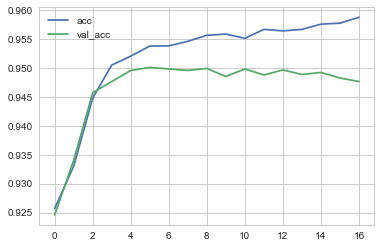

In [116]:
plt.plot(hist.history["acc"], label='acc')
plt.plot(hist.history["val_acc"], label='val_acc')
plt.legend()
plt.savefig('performance')
plt.show()